## Install Modules

In [ ]:
# !pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip3 install detecto  
# !pip3 install labelImg

## Import Modules

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from detecto import core, utils, visualize

## Format the Images

In [2]:
def format_images(directory, size):
    for i, img in enumerate(os.listdir(directory)):
        im = Image.open(directory+img)
        im_resize = im.resize(size, Image.ANTIALIAS)
        im_resize.save(directory+str(i)+'.jpg')
        os.remove(directory+img)

In [3]:
format_images('images/', (800, 600))

## Label the Images

In [4]:
# annotate the images
!labelImg

Image:C:\Users\Aswin\notebooks\Data Science Projects\Deep Learning\Face Mask Detection - Object Detection\images\12.jpg -> Annotation:C:/Users/Aswin/notebooks/detecto/images\12.xml
Image:C:\Users\Aswin\notebooks\Data Science Projects\Deep Learning\Face Mask Detection - Object Detection\images\0.jpg -> Annotation:C:/Users/Aswin/notebooks/Data Science Projects/Deep Learning/Face Mask Detection - Object Detection/images\0.xml
Image:C:\Users\Aswin\notebooks\Data Science Projects\Deep Learning\Face Mask Detection - Object Detection\images\1.jpg -> Annotation:C:/Users/Aswin/notebooks/Data Science Projects/Deep Learning/Face Mask Detection - Object Detection/images\1.xml


## Train the Model

In [5]:
dataset = core.Dataset('images/')
model = core.Model(['mask'])
model.fit(dataset)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:14<00:00,  1.07it/s]


## Test the Model

['mask']
tensor([0.9837])


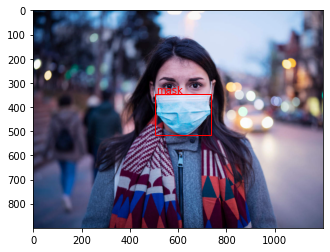

In [6]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

## Adding Augmentations

In [8]:
from torchvision import transforms
augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform()
])

dataset = core.Dataset('images/', transform=augmentations)
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

model = core.Model(['mask'])

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.86s/it]


ValueError: x, y, and format string must not be None

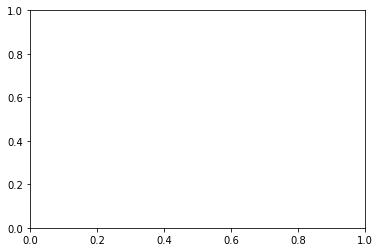

In [9]:
losses = model.fit(loader, epochs=10, learning_rate=0.001, lr_step_size=5, verbose=True)

['mask']
tensor([0.8742])


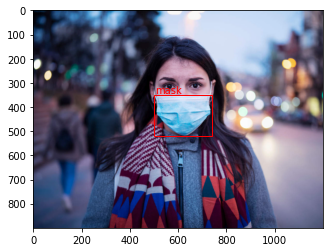

In [12]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

['mask']
tensor([0.9276])


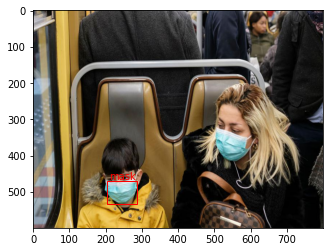

In [15]:
image = utils.read_image('test/test2.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)